In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
lambda_ = 589.3*(10**-6) # in mm

In [3]:
def straight_line(x, m, c): return m*x + c
def plotting_function(xs, ys, popt, pcov, xlabel='', ylabel='', plot_shape='kD', round_to=4, tex_pos=(0.5, 0.15)):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k')

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)

In [4]:
data = [{
    'temp': 24.3,
    'fringes': np.array([8.82, 10.24, 11.72, 13.24, 14.77])
},
{
    'temp': 37.7,
    'fringes': np.array([8.77, 10.04, 11.38, 12.75, 14.18])
},
{
    'temp': 48,
    'fringes': np.array([8.99, 10.26, 11.56, 12.91, 14.31])
},
{
    'temp': 58.4,
    'fringes': np.array([9.09, 10.24, 11.43, 12.60, 13.84])
},
{
    'temp': 75,
    'fringes': np.array([8.94, 10.02, 11.09, 12.20, 13.30])
}]

In [5]:
thetas, temps = [], []
table = []

for temp_set in data:
    temps.append(temp_set['temp']+273.15)
    widths = np.diff(temp_set['fringes'])
    beta = np.mean(widths)/5
    theta = np.arctan(lambda_/(2*beta))*1000 # x 10e3
    thetas.append(theta)
    
    table.append([widths, temp_set['fringes']])


thetas = np.array(thetas)
temps = np.array(temps)

If the Equation is y = mx + c
For the best fit curve:
    m = 0.00717 ± 0.0007274
    c = -1.151 ± 0.2344

The curve looks like:


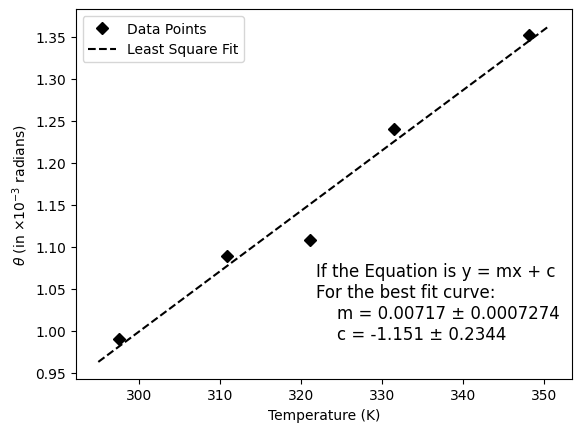

In [6]:
curve = curve_fit(straight_line, temps, thetas)
plotting_function(temps, thetas, curve[0], curve[1], 'Temperature (K)', r'$\theta$ (in $\times 10^{-3}$ radians)')

In [7]:
l = 5.5 # length of the glass plate - in cm 
L = 2.063 # og length of rod - in cm
slope, err_slope = curve[0][0], curve[1][0][0]

alpha = (l*curve[0][0]*0.001)/L
delta = alpha*np.sqrt((0.1/l)**2 + (0.001/L)**2 + (err_slope/slope)**2)

print(f'Coefficient of linear expansion: ({round(alpha*10**6, 3)} \u00B1 {round(delta*10**6, 3)}) x 10e6 K^-1')

Coefficient of linear expansion: (19.114 ± 0.348) x 10e6 K^-1


### Including bad data

If the Equation is y = mx + c
For the best fit curve:
    m = 0.00717 ± 0.0007274
    c = -1.151 ± 0.2344

The curve looks like:


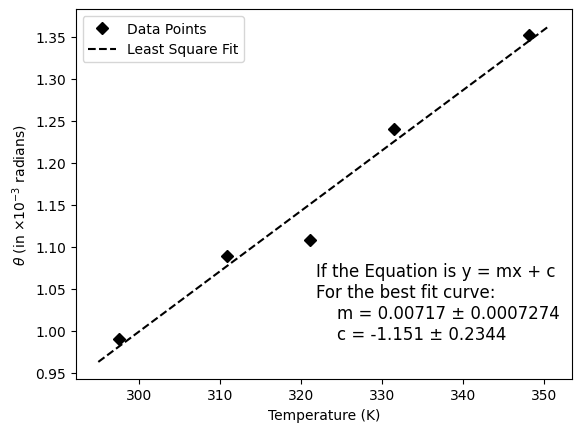

In [8]:
curve = curve_fit(straight_line, temps, thetas)
plotting_function(temps, thetas, curve[0], curve[1], 'Temperature (K)', r'$\theta$ (in $\times 10^{-3}$ radians)')

In [9]:
l = 5.5 # length of the glass plate - in cm 
L = 2.063 # og length of rod - in cm
slope, err_slope = curve[0][0], curve[1][0][0]

alpha = (l*curve[0][0]*0.001)/L
delta = alpha*np.sqrt((0.1/l)**2 + (0.01/L)**2 + (err_slope/slope)**2)

print(f'Coefficient of linear expansion: ({round(alpha*10**6, 3)} \u00B1 {round(delta*10**6, 3)}) x 10e6 K^-1')

Coefficient of linear expansion: (19.114 ± 0.36) x 10e6 K^-1


In [10]:
np.sqrt((0.1/l)**2 + (0.01/L)**2 + (err_slope/slope)**2)

0.01881702339702578